# Problem statement.
# Recommend a best book based on the ratings.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load Movies data
data = pd.read_csv('book R.csv',encoding = 'latin1')


In [3]:
data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [4]:
data.head(3)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [5]:
book = data.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis =1)
book.head()

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [90]:
avg_rate=book.book_rating.mean()
avg_rate

7.5663

In [6]:
book.isnull().sum()

user_id        0
book_title     0
book_rating    0
dtype: int64

# We will recommend movies based on user-user similarity and item-item similarity. For that, first we need to calculate the number of unique users and Books.

In [7]:
n_users = book.user_id.unique().shape[0]
n_users

2182

In [8]:
B_items = book.book_title.unique().shape[0]
B_items

9659

In [9]:
book_df =book.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
book_df.user_id = book.user_id.unique()
book_df.user_id

<ipython-input-10-39668f8a68ae>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  book_df.user_id = book.user_id.unique()


array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [11]:
book_df.fillna(0, inplace=True)
book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# One of the most basic metrics you can think of is the ranking to decide which top 250 books are based on their respective ratings.

In [88]:
C = data['Book.Rating'].mean()
print(C)

7.5663


# from the above output, you can observe that the average rating of a book  is around 7.5on a scale of 10.

# Next, let's calculate the number of ratings  received by a book in the 90th percentile. The pandas library makes this task extremely trivial using the .quantile() method of pandas:

In [13]:
# Calculate the minimum number of votes required to be in the chart, m
m = data['Book.Rating'].quantile(0.90)
print(m)

10.0


#  ince now you have the m you can simply use a greater than equal to condition to filter out movies having greater than equal to 10 vote counts:

In [14]:
# Filter out all qualified Books into a new DataFrame
q_Books = data.copy().loc[data['Book.Rating'] >= m]
q_Books.shape

(1732, 3)

In [15]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [16]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [17]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [18]:

#Store the results in a dataframe
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = book.user_id.unique()
uc_sim_df.columns = book.user_id.unique()

In [19]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
uc_sim_df.idxmax(axis=1)[0:125]

276726    276726
276729    276729
276736    276736
276737    276737
276744    276744
           ...  
277139    277139
277143    277143
277157    277157
277159    277159
277165    277165
Length: 125, dtype: int64

In [37]:
u=book[(book['user_id']==276726) | (book['user_id']==17)]
u

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
2413,17,Conversations With Dogbert: A Dilbert Book,7
2414,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,17,You Don't Need Experience if You've Got Attitude,6
2416,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [42]:
user_1=book[(book['user_id']==276726)] 
user_1

,user_id,book_title,book_rating
0,276726,Classical Mythology,5


In [43]:
user_2=book[(book['user_id']==17)] 
user_2

,user_id,book_title,book_rating
2413,17,Conversations With Dogbert: A Dilbert Book,7
2414,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,17,You Don't Need Experience if You've Got Attitude,6
2416,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [22]:
indices = pd.Series(book.index, index=book['book_title']).drop_duplicates()

In [23]:
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [24]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(book_title, cosine_sim=uc_sim):
    # Get the index of the books that matches the title
    idx = indices[book_title]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:11]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return book['book_title'].iloc[books_indices]

In [28]:
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [33]:
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [44]:
pd.merge(user_1,user_2,on='book_rating',how='outer')

,user_id_x,book_title_x,book_rating,user_id_y,book_title_y
0,276726.0,Classical Mythology,5,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,7,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,6,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,3,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [79]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]  

In [80]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

In [81]:
#Finding the correlation with different movies
similar_to_book = book_df.corrwith(book_user_rating) 

In [82]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [85]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [99]:
ratings_mean_count = pd.DataFrame(book.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book.groupby('book_title')['book_rating'].count())

<AxesSubplot:>

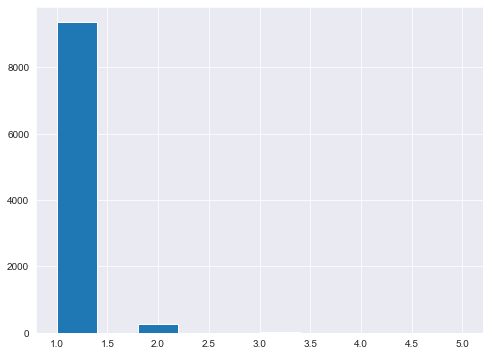

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

<AxesSubplot:>

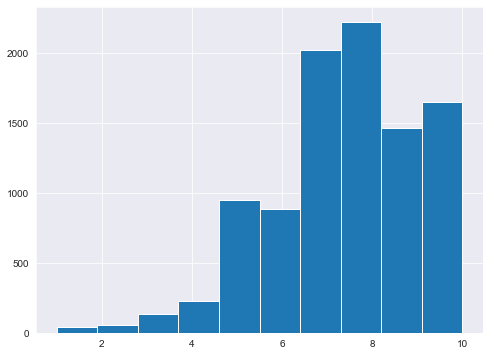

In [106]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10)

<Figure size 576x432 with 0 Axes>

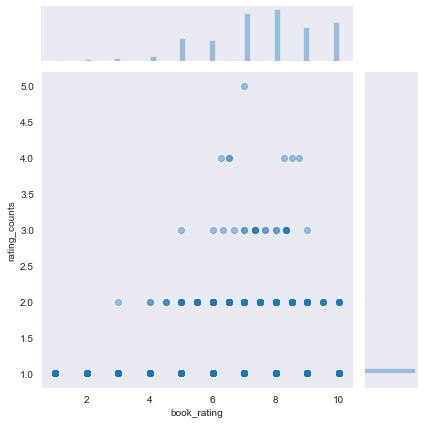

In [107]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='book_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

# Conclusion:-
# From the output you can see that the Books that have high correlation with " are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those Books  and only  other books and rated  them same.
